Importing Lib

In [7]:
pip install kagglehub tensorflow matplotlib seaborn pillow numpy


  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cache

 Extract the ZIP File

In [11]:
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Step 1: Define local ZIP file path
zip_file_path = r"D:\Garbage Classification\archive (10).zip"

# Step 2: Extract ZIP file
extract_path = r"D:\Garbage Classification\extracted_data"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)


Extracted to: D:\Garbage Classification\extracted_data


Inspect the Extracted Folder

In [13]:
for root, dirs, files in os.walk(extract_path):
    print("Root:", root)
    print("Dirs:", dirs)
    print("Files:", files)
    print("-" * 50)


Root: D:\Garbage Classification\extracted_data
Dirs: ['TrashType_Image_Dataset']
Files: []
--------------------------------------------------
Root: D:\Garbage Classification\extracted_data\TrashType_Image_Dataset
Dirs: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Files: []
--------------------------------------------------
Root: D:\Garbage Classification\extracted_data\TrashType_Image_Dataset\cardboard
Dirs: []
Files: ['cardboard_001.jpg', 'cardboard_002.jpg', 'cardboard_003.jpg', 'cardboard_004.jpg', 'cardboard_005.jpg', 'cardboard_006.jpg', 'cardboard_007.jpg', 'cardboard_008.jpg', 'cardboard_009.jpg', 'cardboard_010.jpg', 'cardboard_011.jpg', 'cardboard_012.jpg', 'cardboard_013.jpg', 'cardboard_014.jpg', 'cardboard_015.jpg', 'cardboard_016.jpg', 'cardboard_017.jpg', 'cardboard_018.jpg', 'cardboard_019.jpg', 'cardboard_020.jpg', 'cardboard_021.jpg', 'cardboard_022.jpg', 'cardboard_023.jpg', 'cardboard_024.jpg', 'cardboard_025.jpg', 'cardboard_026.jpg', 'cardboard_027.

Count Samples per Class + Bar Plot

Class Counts: {'cardboard': 403, 'glass': 501, 'metal': 410, 'paper': 594, 'plastic': 482, 'trash': 137}


C:\Users\HP\AppData\Local\Temp\ipykernel_14584\4103018145.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")


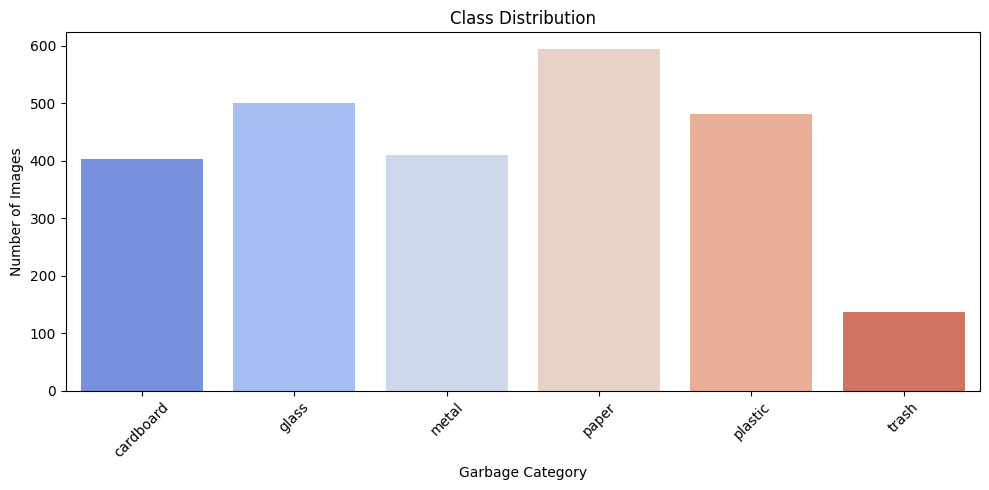

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = r"D:\Garbage Classification\extracted_data\TrashType_Image_Dataset"

# Get all class names
classes = [cls for cls in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, cls))]

# Count samples in each class
class_counts = {
    cls: len(os.listdir(os.path.join(train_dir, cls)))
    for cls in classes
}

print("Class Counts:", class_counts)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Garbage Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Show Sample Images from Each Class

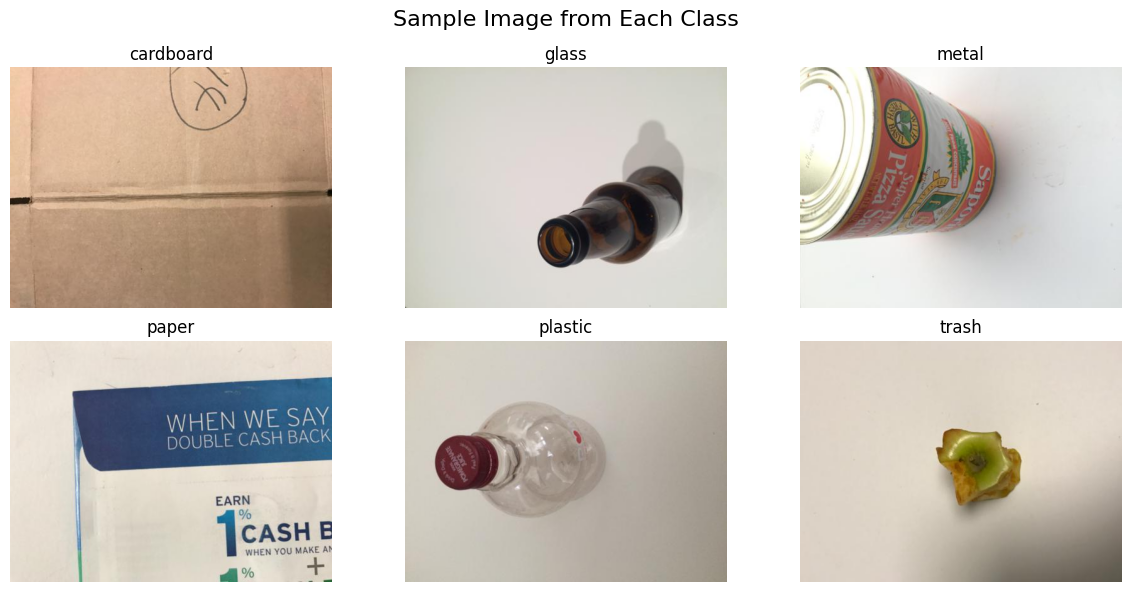

In [16]:
from PIL import Image

plt.figure(figsize=(12, 6))
for i, cls in enumerate(classes[:6]):  # limit to 6 classes for layout
    class_path = os.path.join(train_dir, cls)
    image_name = os.listdir(class_path)[0]  # pick first image
    image_path = os.path.join(class_path, image_name)
    img = Image.open(image_path)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.suptitle("Sample Image from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


Exploratory Data Analysis (EDA)

Image Shape & Resolution Analysis

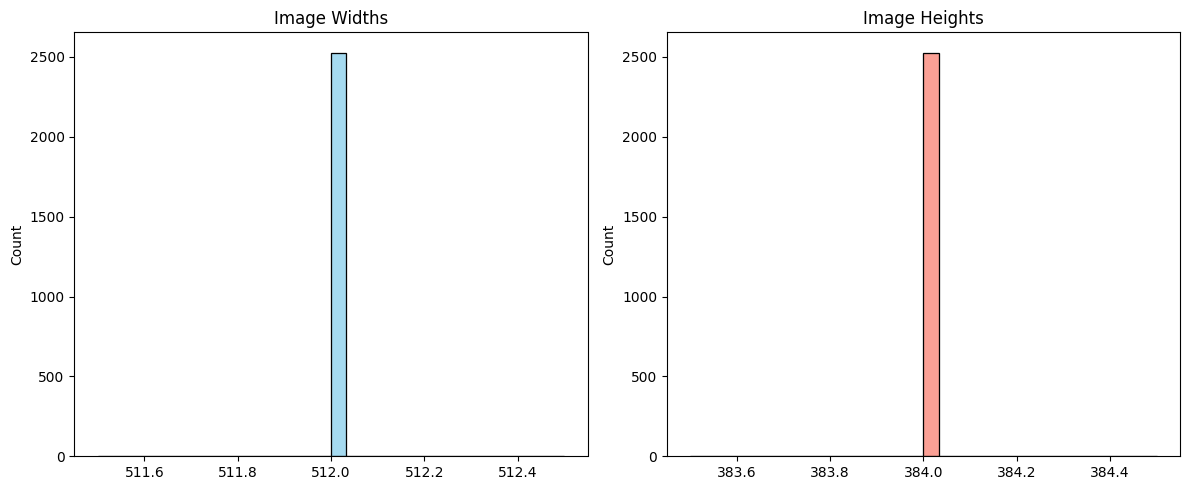

Avg Resolution: 512x384
Min: 512x384, Max: 512x384


In [17]:
from PIL import Image
import numpy as np

widths = []
heights = []

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            widths.append(img.width)
            heights.append(img.height)
        except:
            continue  # skip corrupted images

# Plot resolution distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, color="skyblue")
plt.title("Image Widths")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, color="salmon")
plt.title("Image Heights")

plt.tight_layout()
plt.show()

print(f"Avg Resolution: {int(np.mean(widths))}x{int(np.mean(heights))}")
print(f"Min: {min(widths)}x{min(heights)}, Max: {max(widths)}x{max(heights)}")


Color Mode Check (RGB vs Grayscale)

In [18]:
from collections import Counter

modes = []

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path)[:10]:  # check first 10 per class
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            modes.append(img.mode)
        except:
            continue

mode_counts = Counter(modes)
print("Image Color Modes:", mode_counts)


Image Color Modes: Counter({'RGB': 60})


Show RGB Histogram for One Sample

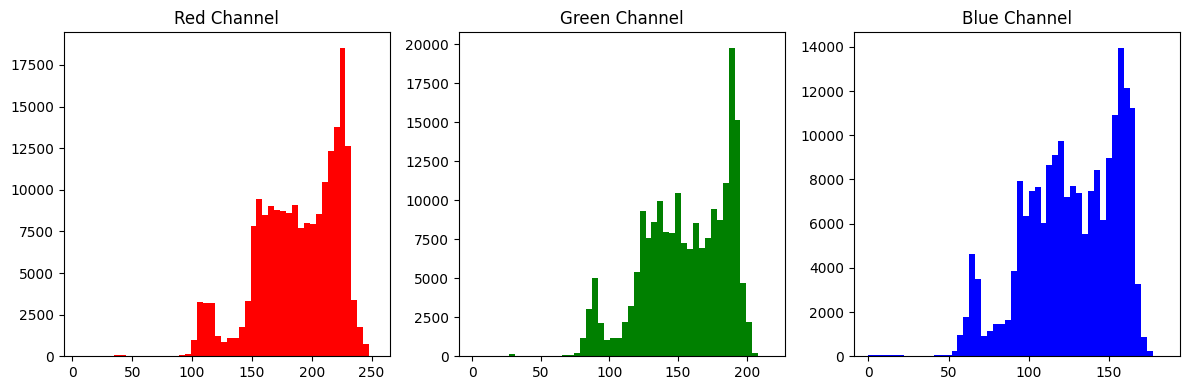

In [19]:
sample_img_path = os.path.join(train_dir, classes[0], os.listdir(os.path.join(train_dir, classes[0]))[0])
img = Image.open(sample_img_path)

r, g, b = img.split()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(np.array(r).flatten(), bins=50, color='red')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.hist(np.array(g).flatten(), bins=50, color='green')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.hist(np.array(b).flatten(), bins=50, color='blue')
plt.title('Blue Channel')

plt.tight_layout()
plt.show()


Data Preprocessing

Preprocessing using Keras (ImageDataGenerator)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image settings
img_size = (224, 224)
batch_size = 32

# Data Augmentation (only for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% will be used for val + test
)

# Validation/Test: only rescale
val_test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

# Training data (70%)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation + Test (30%) → We'll split this later into 15%/15%
val_test_generator = val_test_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)


Found 1771 images belonging to 6 classes.
Found 756 images belonging to 6 classes.


Split Validation & Test Manually

In [24]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import numpy as np

# Get all val/test data
val_test_images, val_test_labels = [], []

for i in range(len(val_test_generator)):
    x, y = val_test_generator[i]
    val_test_images.extend(x)
    val_test_labels.extend(y)

# Convert to numpy arrays
val_test_images = np.array(val_test_images)
val_test_labels = np.array(val_test_labels)

# Split into validation and test
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42, stratify=val_test_labels.argmax(axis=1)
)

print("Final Split:")
print("Train:", len(train_generator.filenames))
print("Validation:", len(X_val))
print("Test:", len(X_test))


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/10.7 MB 2.1 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/10.7 MB 2.6 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/10.7 MB 2.5 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/10.7 MB 2.7 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/10.7 MB 2.9 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/10.7 MB 3.1 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/10.7 MB 3.4 MB/s eta 0:00:02
   --------------------------- ------------ 7.3/10.7 MB 3.6 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 3.8 MB/s eta 0:00:01
   ------------------